### 0. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Reading and Exploring Dataset

##### 1.1 Reading csv file as a DataFrame using Pandas

In [2]:
df_hotel = pd.read_csv("./Hotel Bookings.csv")
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


##### 1.2 Number of Data Points

In [3]:
df_hotel.shape

(119390, 32)

##### 1.3 Concise Summary of Data Frame

In [4]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##### 1.4 Descriptive Statistics of Numerical Columns of Data Frame

In [5]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


##### 1.5 Checking Number of Missing Values (As we can see in summary only 4 columns have missing values)

In [6]:
df_hotel.isnull().sum().sort_values(ascending=False)[:4]

company     112593
agent        16340
country        488
children         4
dtype: int64

##### 1.6 Handling missing values

In [7]:
# 1.6.1 company has numerical values, so filling missing values with 0
df_hotel['company'].fillna(0, inplace=True)

# 1.6.2 agent has numerical values, so filling missing values with 0
df_hotel['agent'].fillna(0, inplace=True)

# 1.6.3 country has string values, so filling missing values as 'unknown'
df_hotel['country'].fillna('unknown', inplace=True)

# 1.6.4 children has numerical values, so filling missing values as 0
df_hotel['children'].fillna(0, inplace=True)

## Verifying again missing values
df_hotel.isnull().sum().sort_values(ascending=False)[:4]

hotel                        0
is_canceled                  0
reservation_status           0
total_of_special_requests    0
dtype: int64

### 2. Analysis

##### 2.1 How often assigned rooms are different from reserved and do having children and/or babies have any impact ?

In [8]:
def isAssgnRmDiffFromRsvdRm(item):
    if(item['reserved_room_type'] != item['assigned_room_type']):
        return 1
    else:
        return 0
def areAnyChildrenOrBabies(item):
    if(item['children'] > 0 or item['babies'] > 0):
        return 1
    else:
        return 0

df_hotel['got_different_room'] = df_hotel[['reserved_room_type','assigned_room_type']].apply(isAssgnRmDiffFromRsvdRm, axis = 1)
df_hotel['any_child_or_babies'] = df_hotel[['children','babies']].apply(areAnyChildrenOrBabies, axis = 1)

df_hotel.groupby(['got_different_room'])['got_different_room'].count()

got_different_room
0    104473
1     14917
Name: got_different_room, dtype: int64

,got_different_room,any_child_or_babies
got_different_room,1.000000,0.010383
any_child_or_babies,0.010383,1.000000


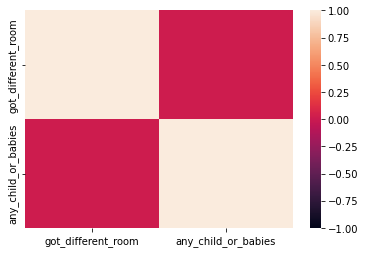

In [9]:
df = df_hotel[['got_different_room','any_child_or_babies']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

In [44]:
df_gotDiffRoom = df_hotel[df_hotel['got_different_room'] == 1]
df = df_gotDiffRoom.groupby(['hotel']).agg({'any_child_or_babies': ['count','sum']})
print(df)
df.apply(lambda x: x.any_child_or_babies['sum'] / x.any_child_or_babies['count'], axis = 1)

             any_child_or_babies     
                           count  sum
hotel                                
City Hotel                  7192  864
Resort Hotel                7725  412


hotel
City Hotel      0.120133
Resort Hotel    0.053333
dtype: float64

In [45]:
df_gotSameRoom = df_hotel[df_hotel['got_different_room'] == 0]
df = df_gotSameRoom.groupby(['hotel']).agg({'any_child_or_babies': ['count','sum']})
print(df)
df.apply(lambda x: x.any_child_or_babies['sum'] / x.any_child_or_babies['count'], axis = 1)

             any_child_or_babies      
                           count   sum
hotel                                 
City Hotel                 72138  4539
Resort Hotel               32335  3517


hotel
City Hotel      0.062921
Resort Hotel    0.108768
dtype: float64

##### 2.2 Do non repeated guests cancel more often than repeated ones ?

,is_repeated_guest,is_canceled
is_repeated_guest,1.000000,-0.084793
is_canceled,-0.084793,1.000000


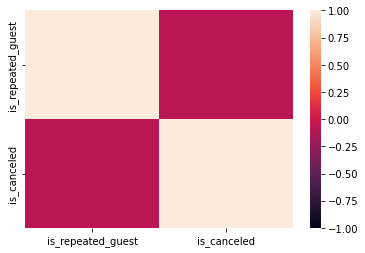

In [10]:
df = df_hotel[['is_repeated_guest','is_canceled']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

In [55]:
df_isRepeatedUser = df_hotel[df_hotel['is_repeated_guest'] == 1]
df = df_gotDiffRoom.groupby(['hotel']).agg({'is_canceled': ['count','sum']})
print(df)
df.apply(lambda x: x.is_canceled['sum'] / x.is_canceled['count'], axis = 1)

             is_canceled     
                   count  sum
hotel                        
City Hotel          7192  418
Resort Hotel        7725  384


hotel
City Hotel      0.058120
Resort Hotel    0.049709
dtype: float64

In [56]:
df_isNonRepeatedUser = df_hotel[df_hotel['is_repeated_guest'] == 0]
df = df_isNonRepeatedUser.groupby(['hotel']).agg({'is_canceled': ['count','sum']})
print(df)
df.apply(lambda x: x.is_canceled['sum'] / x.is_canceled['count'], axis = 1)

             is_canceled       
                   count    sum
hotel                          
City Hotel         77298  32661
Resort Hotel       38282  11011


hotel
City Hotel      0.422534
Resort Hotel    0.287629
dtype: float64

##### 2.3 Do customers who were on the waiting list for a long time have less cancellation compared to others ?

,lead_time,is_canceled
lead_time,1.000000,0.293123
is_canceled,0.293123,1.000000


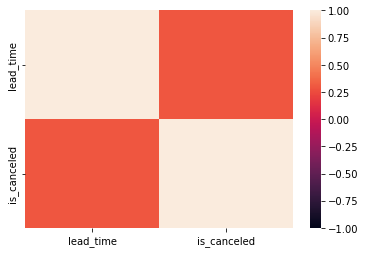

In [11]:
df = df_hotel[['lead_time','is_canceled']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

In [59]:
df_isCancelled = df_hotel[df_hotel['is_canceled'] == 1]
df = df_isCancelled.groupby(['hotel']).agg({'lead_time': ['mean']})
df

,lead_time
,mean
hotel,
City Hotel,150.281222
Resort Hotel,128.680543


In [60]:
df_isNotCancelled = df_hotel[df_hotel['is_canceled'] == 0]
df = df_isNotCancelled.groupby(['hotel']).agg({'lead_time': ['mean']})
df

,lead_time
,mean
hotel,
City Hotel,80.702734
Resort Hotel,78.837618


##### 2.4 Do a number of special requests have any correlation with having children/babies ?

,total_of_special_requests,any_child_or_babies
total_of_special_requests,1.00000,0.13083
any_child_or_babies,0.13083,1.00000


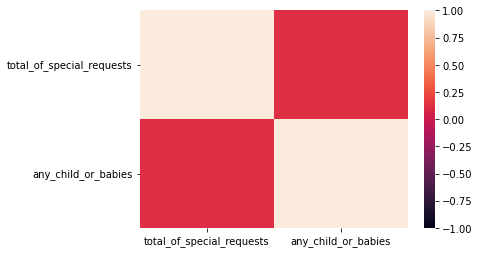

In [12]:
df = df_hotel[['total_of_special_requests','any_child_or_babies']]
sns.heatmap(df.corr(), vmin=-1, vmax=1)
df.corr()

##### 2.5 Number of Booking per year for two hotels

In [66]:
df = df_hotel.groupby(['hotel','arrival_date_year']).size()
df

hotel         arrival_date_year
City Hotel    2015                 13682
              2016                 38140
              2017                 27508
Resort Hotel  2015                  8314
              2016                 18567
              2017                 13179
dtype: int64

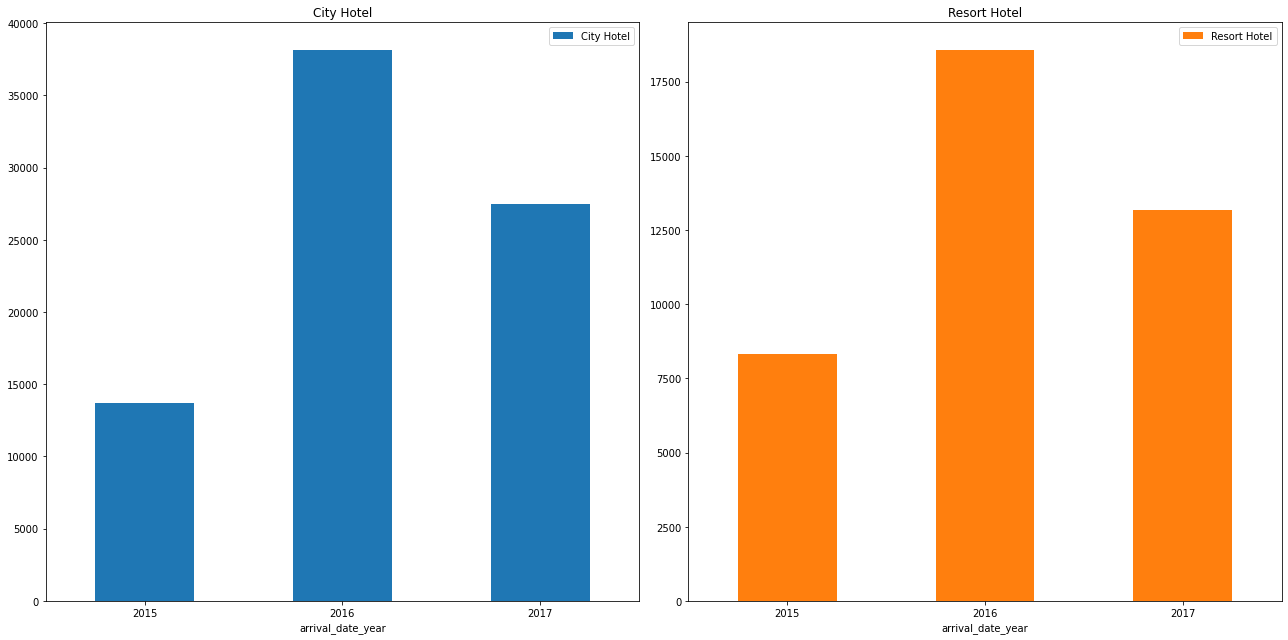

In [81]:
ax = df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(18, 9), layout=(1, 2))
plt.tight_layout()

#### 2.6 Customers distribution based on type

In [82]:
df = df_hotel.groupby(['hotel','customer_type']).size()
df

hotel         customer_type  
City Hotel    Contract            2300
              Group                293
              Transient          59404
              Transient-Party    17333
Resort Hotel  Contract            1776
              Group                284
              Transient          30209
              Transient-Party     7791
dtype: int64

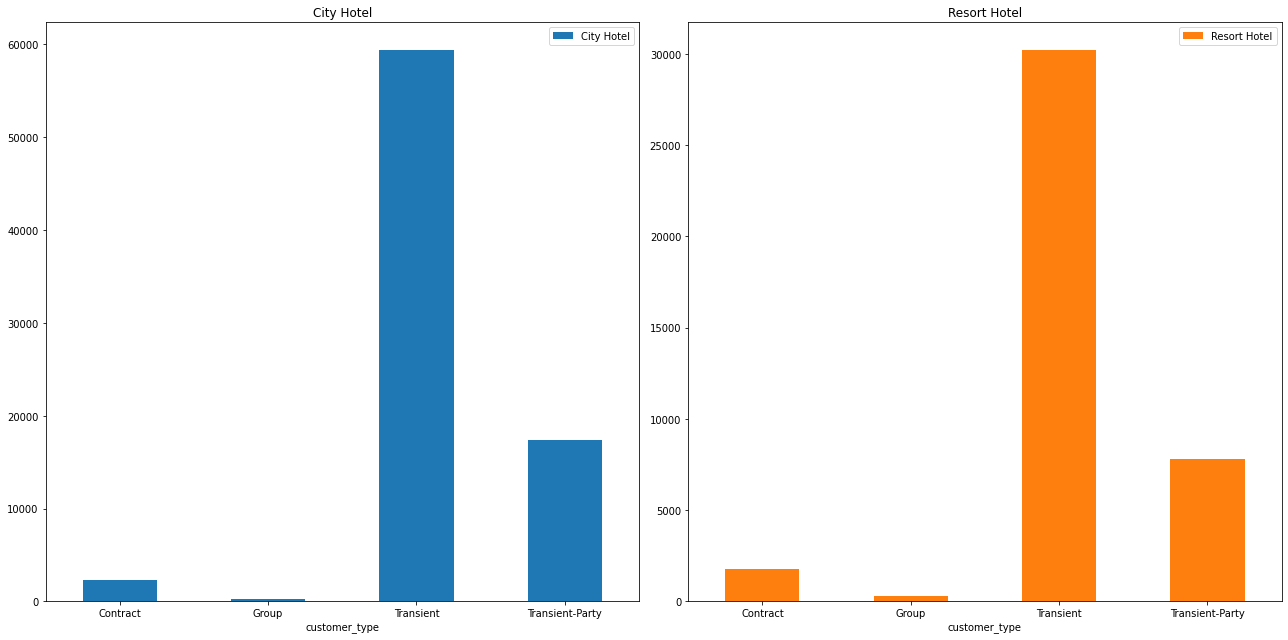

In [86]:
ax = df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(18, 9), layout=(1, 2))
plt.tight_layout()

##### 2.7 Booking distribution based on Assigned Room Types

In [87]:
df = df_hotel.groupby(['hotel','assigned_room_type']).size()
df

hotel         assigned_room_type
City Hotel    A                     57007
              B                      2004
              C                       161
              D                     14983
              E                      2168
              F                      2018
              G                       700
              K                       279
              P                        10
Resort Hotel  A                     17046
              B                       159
              C                      2214
              D                     10339
              E                      5638
              F                      1733
              G                      1853
              H                       712
              I                       363
              L                         1
              P                         2
dtype: int64

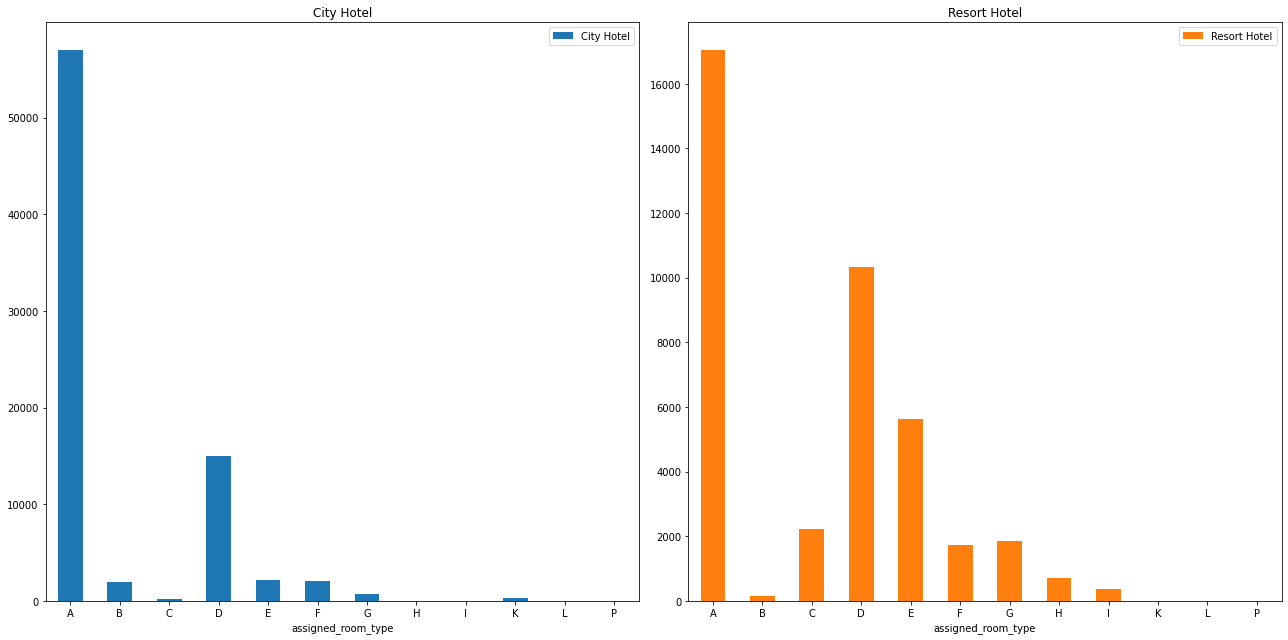

In [88]:
ax = df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(18, 9), layout=(1, 2))
plt.tight_layout()